<a href="https://colab.research.google.com/github/raquel1313/Evaluacion1FML/blob/main/Ev1_buena_RaquelRehbein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis exploratorio de datos para el dataset "Customer Personality Analysis"**
**Autora:** Raquel Rehbein Brange

##Introducción

Este trabajo corresponde a la Evaluación Parcial 1 de la asignatura *Fundamentos de Machine Learning*, cuyo objetivo es aplicar conceptos de estadística descriptiva a un conjunto de datos reales.

El dataset utilizado proviene de una empresa de ventas que realizó campañas de marketing y contiene información sobre los clientes, incluyendo datos demográficos, nivel de ingresos, comportamiento de compra y respuesta a campañas publicitarias.

El propósito de este análisis exploratorio de datos (EDA) es:
- Identificar y clasificar las variables presentes en el conjunto de datos.
- Calcular medidas estadísticas como medias, medianas, desviaciones estándar y rangos.
- Analizar la distribución de variables clave (como ingresos, edad y gasto).
- Visualizar la información mediante gráficos estadísticos.
- Detectar valores atípicos que puedan afectar el análisis.
- Extraer conclusiones preliminares sobre el comportamiento de los clientes y su respuesta a campañas de marketing.

A través de esta exploración inicial, se busca comprender mejor los perfiles de los clientes y los factores que influyen en sus decisiones de compra.

##Carga de datos

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

##Carga del dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep="\t")
df.head()

Saving marketing_campaign.csv to marketing_campaign.csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


##Identificacion de laa variables

In [ ]:
##  Identificación y descripción de las variables
print("\n--- Tipos de Variables ---")
print(df.dtypes)

# Clasificación de variables
print("\n--- Clasificación de variables ---")

# Variables numéricas (cuantitativas)
numericas_continuas = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
numericas_discretas = ['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer',
                       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
                       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                       'Complain', 'Response']

# Variables categóricas (cualitativas)
categoricas_nominales = ['Marital_Status', 'Education']
categoricas_ordinales = [] # No hay variables claramente ordinales en este dataset

print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categoricas_nominales)
print("Variables categóricas ordinales:", categoricas_ordinales)

# Convertir variables categóricas al tipo correcto
for col in categoricas_nominales + categoricas_ordinales:
    df[col] = df[col].astype('category')



--- Tipos de Variables ---
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

--- Clasificación de variables ---
Variables numéricas con

In [ ]:
print("\nCantidad de valores nulos por columna:")
df.isnull().sum()


Cantidad de valores nulos por columna:


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##Estadisticos basicos

In [ ]:
print("Cálculo de medidas estadísticas")
print("\n--- Medidas de tendencia central y dispersión ---")
print(df.describe())

Cálculo de medidas estadísticas

--- Medidas de tendencia central y dispersión ---
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597

## Preprocesamiento básico de datos

Antes de continuar con el análisis, realizaremos algunos pasos de preprocesamiento:

In [ ]:
# Verificar y tratar valores nulos
print("\nTotal de valores nulos por columna:")
null_values = df.isnull().sum()
print(null_values[null_values > 0])

# Vemos que la columna Income tiene valores nulos
# Para este análisis, imputaremos con la mediana (más robusta a outliers)
df['Income'] = df['Income'].fillna(df['Income'].median())

# Convertir Dt_Customer a datetime y extraer información útil
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Since_Days'] = (pd.Timestamp('2015-01-01') - df['Dt_Customer']).dt.days
# Asumimos '2015-01-01' como fecha de referencia según el contexto del dataset

# Calcular edad a partir del año de nacimiento
df['Age'] = 2015 - df['Year_Birth']  # Asumimos 2015 como año de referencia

# Calcular gasto total por cliente
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                  df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Calcular número total de hijos
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Calcular número total de compras
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + \
                      df['NumCatalogPurchases'] + df['NumStorePurchases']

# Calcular número total de campañas aceptadas
df['NumAcceptedCmps'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + \
                        df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# Verificar que no queden valores nulos
print("\nVerificación final de valores nulos:")
print(df.isnull().sum().sum())


Total de valores nulos por columna:
Income    24
dtype: int64

Verificación final de valores nulos:
0


## Creacion de columnas útiles para análisis


In [ ]:
df['Age'] = 2025 - df['Year_Birth']
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']



In [ ]:
#estdisticos de las nuevas variables
df['Age'].describe()

,Age
count,2240.000000
mean,56.194196
std,11.984069
min,29.000000
25%,48.000000
50%,55.000000
75%,66.000000
max,132.000000


In [ ]:
df['Total_Spent'].describe()


,Total_Spent
count,2240.000000
mean,605.798214
std,602.249288
min,5.000000
25%,68.750000
50%,396.000000
75%,1045.500000
max,2525.000000


In [ ]:

df['Total_Kids'].describe()

,Total_Kids
count,2240.000000
mean,0.950446
std,0.751803
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000


##Análisis de distribución y visualizaciones

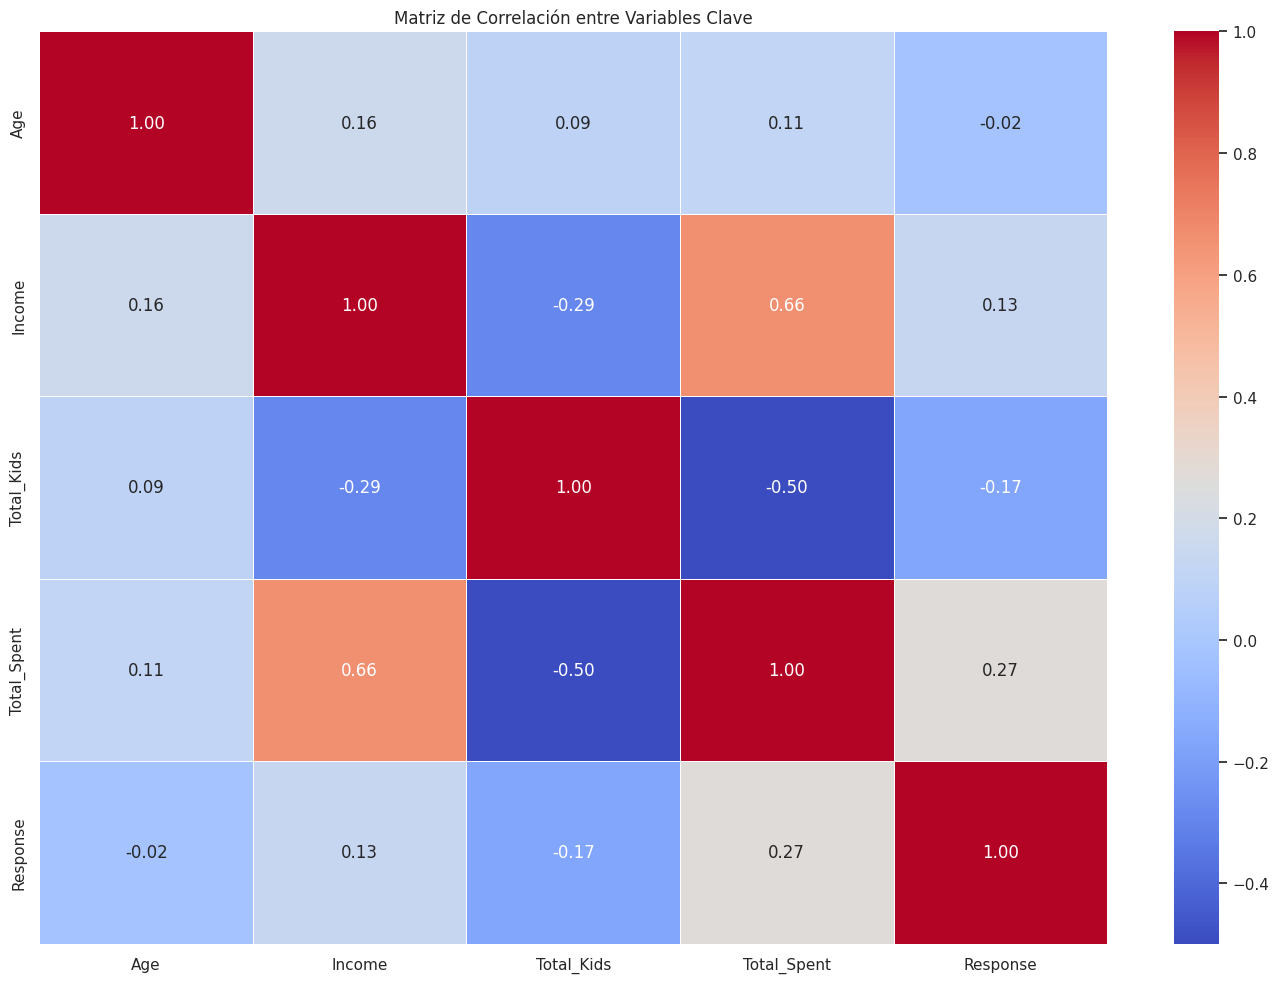

In [ ]:
#Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_vars = ['Age', 'Income', 'Total_Kids', 'Total_Spent', 'Response']
corr_matrix = df[correlation_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Clave')
plt.tight_layout()
plt.show()

Podemos notar  que la correlacion mas aceptable es entre ingresos y gaastos totales

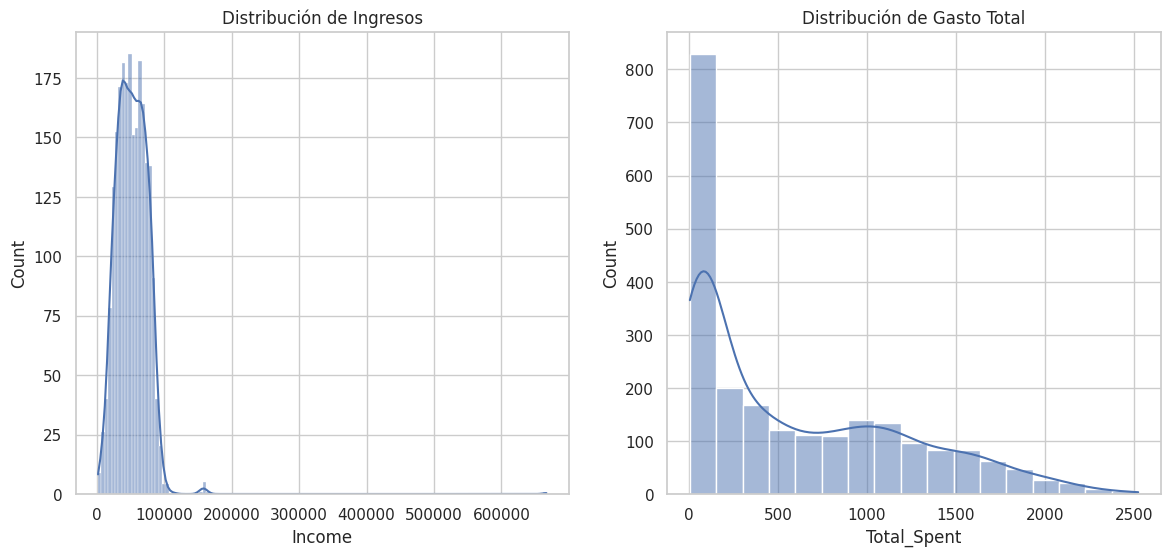

In [ ]:
# Histogramas
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df['Income'], kde=True)
plt.title('Distribución de Ingresos')

plt.subplot(1,2,2)
sns.histplot(df['Total_Spent'], kde=True)
plt.title('Distribución de Gasto Total')
plt.show()



###Distribución de Ingresos:

La distribución está fuertemente sesgada hacia la derecha (positivamente asimétrica)\
Hay muy pocos clientes con ingresos superiores a $200,000 \
Se observa una cola larga que se extiende hasta aproximadamente 600,000 unidades
###Distribución de Gasto Total:

También muestra una distribución asimétrica positiva, pero con características diferentes\
El mayor número de clientes tiene gastos muy bajos\

###Conclusiones preliminares:

La mayoría de los clientes tienen ingresos moderados pero hay algunos valores atípicos con ingresos muy altos\
El patrón de gasto no escala linealmente con los ingresos; muchos clientes gastan cantidades relativamente pequeñas independientemente de sus ingreso\
Parece haber distintos segmentos de clientes: un grupo mayoritario de bajo gasto y grupos más pequeños con gastos progresivamente más altos


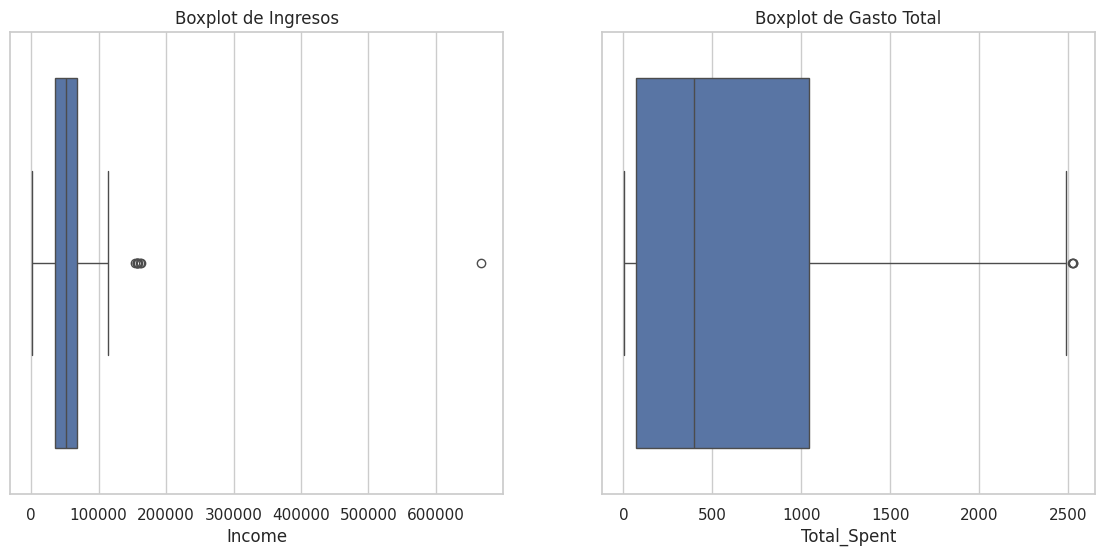

In [ ]:
# Boxplots para identificar outliers
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['Income'])
plt.title('Boxplot de Ingresos')

plt.subplot(1,2,2)
sns.boxplot(x=df['Total_Spent'])
plt.title('Boxplot de Gasto Total')
plt.show()



###Boxplot de Ingresos:

El rango intercuartílico  es bastante compacto, indicando que la mayoría de los ingresos están concentrados en un rango estrecho\
Se observa un valor atípico extremo de  $666,666  \
También hay algunos otros valores atípicos menos extremos cerca de los 200,000\
La distribución está claramente sesgada hacia la derecha, con la mayor parte de los datos en el extremo inferior

###Boxplot de Gasto Total:


El rango intercuartílico se ve menos simetrico\
Hay al menos un valor atípico extremo cercano a 2,500 unidades\
Los "bigotes" son bastante largos, especialmente el superior, mostrando una considerable dispersión incluso dentro de los valores no atípicos

###Concluimos que:

El valor atípico de 666,666 en ingresos probablemente distorsiona significativamente la media, haciéndola poco representativa del cliente "típico"\
Por esto es que sería más apropiado usar la mediana como medida de tendencia central en lugar de la media\
La presencia de valores atípicos tan extremos podría justificar un análisis específico de estos clientes de alto valor

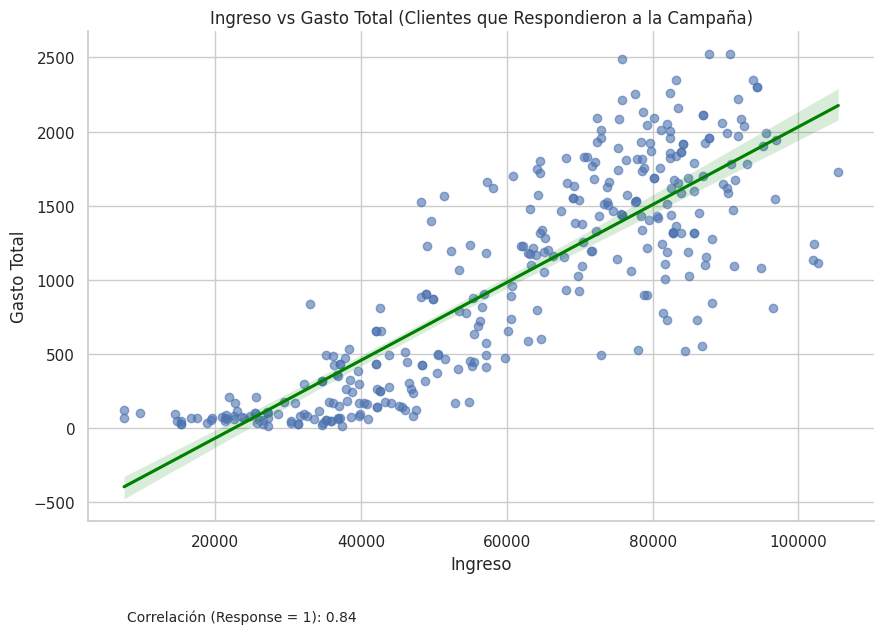

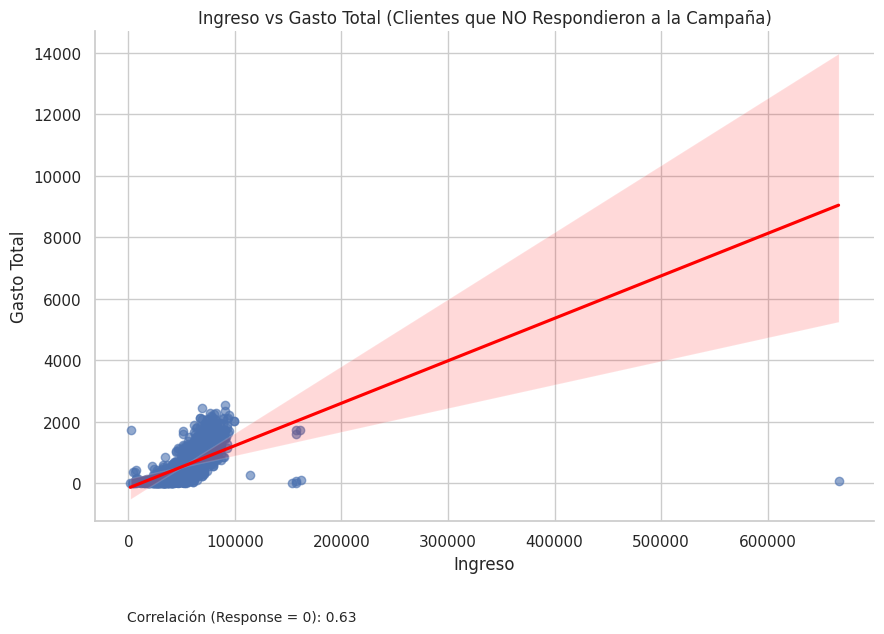

In [ ]:
# Filtrar datos por respuesta a campaña
df_response_1 = df[df['Response'] == 1][['Income', 'Total_Spent']].dropna()
df_response_0 = df[df['Response'] == 0][['Income', 'Total_Spent']].dropna()

# Calcular correlaciones
corr_1 = df_response_1['Income'].corr(df_response_1['Total_Spent'])
corr_0 = df_response_0['Income'].corr(df_response_0['Total_Spent'])

# Gráfico para Response = 1
sns.lmplot(data=df_response_1, x='Income', y='Total_Spent',
           height=6, aspect=1.5, scatter_kws={"alpha": 0.6}, line_kws={"color": "green"})
plt.title('Ingreso vs Gasto Total (Clientes que Respondieron a la Campaña)')
plt.xlabel('Ingreso')
plt.ylabel('Gasto Total')
plt.figtext(0.15, -0.05, f'Correlación (Response = 1): {corr_1:.2f}', fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico para Response = 0
sns.lmplot(data=df_response_0, x='Income', y='Total_Spent',
           height=6, aspect=1.5, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title('Ingreso vs Gasto Total (Clientes que NO Respondieron a la Campaña)')
plt.xlabel('Ingreso')
plt.ylabel('Gasto Total')
plt.figtext(0.15, -0.05, f'Correlación (Response = 0): {corr_0:.2f}', fontsize=10)
plt.tight_layout()
plt.show()


Podemos ver que la correlacion del primer grafico es mucho mas consistente(valor mayor a 0.7) que la del segundo grafico, Esto puede deberse a que en el grafico se encuentra el outlier mas alejado de los datos típicos.

In [ ]:
# Para Estado Civil
print("\n--- Tabla de Frecuencia de Estado Civil ---")
marital_counts = df['Marital_Status'].value_counts()
marital_percent = df['Marital_Status'].value_counts(normalize=True) * 100
marital_table = pd.DataFrame({'Frecuencia': marital_counts, 'Porcentaje (%)': marital_percent.round(2)})
print(marital_table)

# Para Educación
print("\n--- Tabla de Frecuencia de Educación ---")
education_counts = df['Education'].value_counts()
education_percent = df['Education'].value_counts(normalize=True) * 100
education_table = pd.DataFrame({'Frecuencia': education_counts, 'Porcentaje (%)': education_percent.round(2)})
print(education_table)


--- Tabla de Frecuencia de Estado Civil ---
                Frecuencia  Porcentaje (%)
Marital_Status                            
Married                864           38.57
Together               580           25.89
Single                 480           21.43
Divorced               232           10.36
Widow                   77            3.44
Alone                    3            0.13
Absurd                   2            0.09
YOLO                     2            0.09

--- Tabla de Frecuencia de Educación ---
            Frecuencia  Porcentaje (%)
Education                             
Graduation        1127           50.31
PhD                486           21.70
Master             370           16.52
2n Cycle           203            9.06
Basic               54            2.41


Estos datos de frecuencia y porcentaje nos proporcionan una imagen más clara de la distribución demográfica en términos de estado civil y nivel educativo:\
Los clientes casados ("Married") representan el grupo más grande con 38.57%
El segundo grupo más numeroso son personas en relación pero no casadas ("Together") con 25.89%
Combinados, estos dos grupos (personas en relaciones formales) constituyen el 64.46% de la base de clientes\
Exactamente la mitad de los clientes (50.31%) tienen título universitario básico ("Graduation")
Los clientes con títulos avanzados (PhD y Master) suman el 38.22% (21.70% + 16.52%)
Esto significa que casi el 90% (88.53%) de la base de clientes tiene educación universitaria\
A partir de esto podemos concluir que\
La empresa atrae principalmente a clientes con alto nivel educativo, lo que podría sugerir productos/servicios sofisticados o que requieren cierto nivel de conocimiento\
La predominancia de clientes en relaciones estables sugiere oportunidades para estrategias enfocadas en hogares establecidos y compras familiares

In [ ]:
#Identificación de valores atípicos (outliers)
# Usamos rango intercuartil (IQR)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outliers_income = df[(df['Income'] < Q1 - 1.5*IQR) | (df['Income'] > Q3 + 1.5*IQR)]

print(f"\nValores atípicos detectados en Ingresos: {outliers_income.shape[0]} casos")


Valores atípicos detectados en Ingresos: 8 casos
